In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [174]:
with open(f'../../../loss/ResDepth_addition_v4.pkl', 'rb') as f:
        experiment_data = pickle.load(f)

In [3]:
np.mean(experiment_data['r0_baseline'])

0.0009929186227964238

In [29]:
for key, value in experiment_data['r1'].items():
    print(f'{key}, mean: {np.mean(value)}, std: {np.std(value)}')
    stat_val, p_val = ttest_ind(experiment_data['r0_baseline'], value, equal_var=False)
    print(p_val)

('green',), mean: 0.0009699828337033978, std: 0.00013127622265646257
0.556969877757234
('red',), mean: 0.0010043148846307303, std: 0.0001372523799315679
0.7760873662255173
('nir',), mean: 0.0009970410028472543, std: 0.00014025109289571175
0.9191283001341801
('swir2',), mean: 0.0009484662441536784, std: 0.00010803562517431857
0.2079512166209256
('ndvi',), mean: 0.0010026959120295943, std: 0.0001295833629874705
0.8003838342678041
('ndwi',), mean: 0.0009754311849974329, std: 0.00011882012395342159
0.6347259252806262
('fcf',), mean: 0.0009370627092721406, std: 0.00012992120758085479
0.15482756941974143
('aspect',), mean: 0.0009465370694670128, std: 0.00010597798442345938
0.18510737618346473
('eastness',), mean: 0.0010118891950696707, std: 0.00011940327867754908
0.6073688674025346
('tri',), mean: 0.001000973217014689, std: 0.00014135160066416897
0.843556791592953
('tpi',), mean: 0.0009505006335530197, std: 0.00011788718506086567
0.250583410521815
('latitude',), mean: 0.0009796150705369655, 

In [30]:
dic_for_df = experiment_data['r1']
dic_for_df[('core_features',)] = experiment_data['r0_baseline']

In [73]:
# df.mean() - df.core_features.mean()

In [31]:
r1_df = pd.DataFrame.from_dict(dic_for_df, orient='index').transpose()
r1_df.columns = [col[0] for col in r1_df.columns]
means = r1_df.mean()
sorted_columns = means.sort_values().index
r1_df = r1_df[sorted_columns]

improved_list = []
worse_list = []
core_mean = np.mean(experiment_data['r0_baseline'])
for key, value in experiment_data['r1'].items():
    stat_val, p_val = ttest_ind(experiment_data['r0_baseline'], value, equal_var=False)
    feature_mean = np.mean(value)
    if feature_mean < core_mean:
        improved_list.append([key[0], p_val])
    else:
        worse_list.append([key[0], p_val])

improved_sorted = sorted(improved_list, key=lambda x: x[1], reverse=False)
worse_sorted = sorted(worse_list, key=lambda x: x[1], reverse=True)

improved_names = [item[0] for item in improved_sorted]
worse_names = [item[0] for item in worse_sorted]
sorted_columns = improved_names + worse_names

r1_df = r1_df[sorted_columns]

Text(0.5, 1.0, 'Validation MSE loss when feature is included with core features')

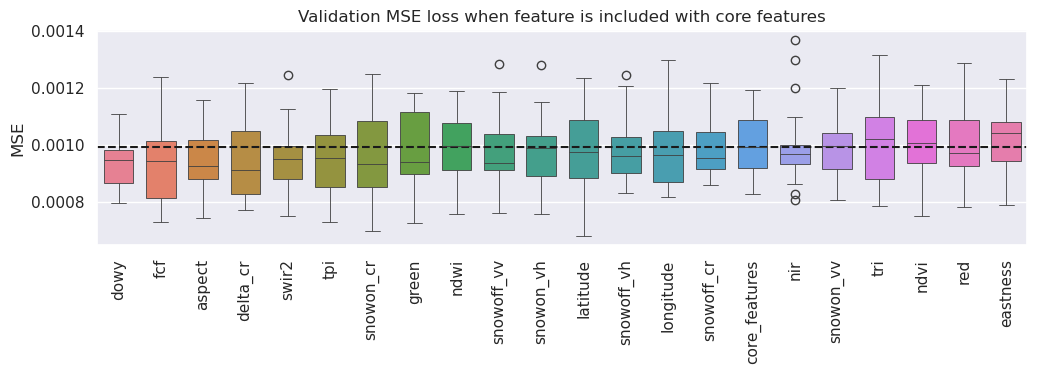

In [32]:
sns.set_theme()
f, ax = plt.subplots(figsize=(12, 2.8))
sns.boxplot(data=r1_df, ax=ax, linewidth=0.6, width=0.7)
#sns.swarmplot(data=df, s=3, ax=ax)
ax.tick_params(axis='x', rotation=90)
ax.axhline(r1_df.core_features.mean(), c='k', linestyle='--')
ax.set_ylabel('MSE')
ax.set_title('Validation MSE loss when feature is included with core features')

#plt.savefig('../../figs/addition_MSE_change.png', dpi=400, bbox_inches="tight")

In [175]:
print(f'r1 min: {r1_df[r1_df.mean().idxmin()].name}, {r1_df[r1_df.mean().idxmin()].mean()}')
print('-----------------------')
for key, value in experiment_data['r2'].items():
    print(f'{key}, mean: {np.mean(value)}, std: {np.std(value)}')
    stat_val, p_val = ttest_ind(r1_df[r1_df.mean().idxmin()], value, equal_var=False)
    print(p_val)

r1 min: fcf, 0.0009370627092721406
-----------------------
('swir2', 'fcf'), mean: 0.0009808118382352404, std: 9.990124042519874e-05
0.2523249556818631
('swir2', 'aspect'), mean: 0.0009537887883197982, std: 0.00011086527358447928
0.6719405457618828
('swir2', 'tpi'), mean: 0.0009765827868250198, std: 9.728506684386227e-05
0.29576136491034394
('swir2', 'dowy'), mean: 0.0009451952595554758, std: 9.467063313691955e-05
0.8267601928251693
('swir2', 'snowon_cr'), mean: 0.0009836808862019098, std: 0.0001330373444221992
0.2813776278318843
('swir2', 'delta_cr'), mean: 0.0009874088635115185, std: 0.00015342380668110917
0.2820779885691018
('fcf', 'aspect'), mean: 0.0009440163612453034, std: 0.00012036551063065128
0.8650272819728472
('fcf', 'tpi'), mean: 0.0009769333380972966, std: 0.00012345309807947045
0.33834007248400877
('fcf', 'dowy'), mean: 0.0009154457180557074, std: 0.0001249435741114265
0.604187304511093
('fcf', 'snowon_cr'), mean: 0.0009479191990976688, std: 0.00011253653221114238
0.78459

In [181]:
dic_for_df = experiment_data['r2']
dic_for_df[('core_features',)] = experiment_data['r0_baseline']

dic_for_df[(r1_df[r1_df.mean().idxmin()].name,)] = r1_df[r1_df.mean().idxmin()]

In [182]:
r2_df = pd.DataFrame.from_dict(dic_for_df, orient='index').transpose()
r2_df.columns = [f'{col}' for col in r2_df.columns]
means = r2_df.mean()
sorted_columns = means.sort_values().index
r2_df = r2_df[sorted_columns]

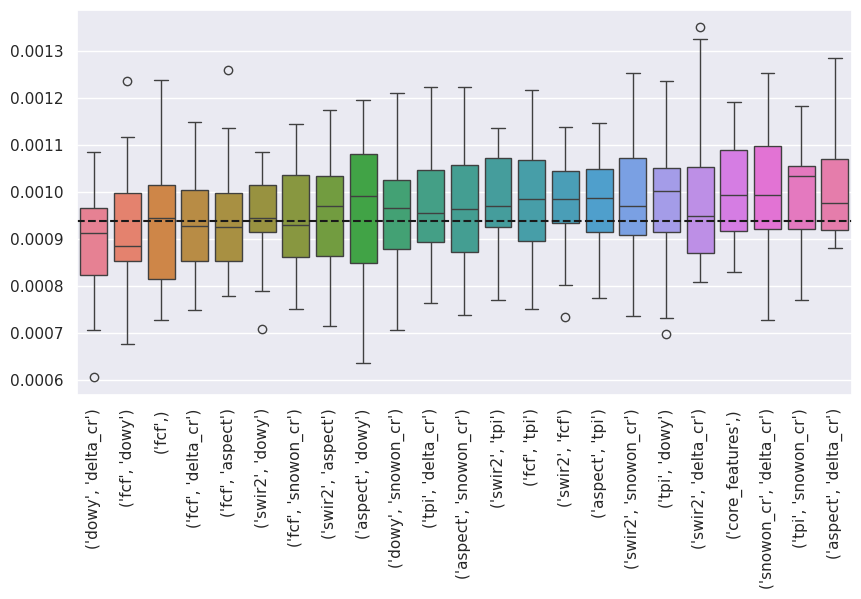

In [184]:
sns.set_theme()
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=r2_df, ax=ax)
ax.axhline(r1_df[r1_df.mean().idxmin()].mean(), c='k', linestyle='--')
#sns.swarmplot(data=r2_df, ax=ax)
ax.tick_params(axis='x', rotation=90)
#ax.axhline(df.core_features.median(), c='r')